# Check

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/dylan/opt/anaconda3/envs/Data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

# Read CSV file

## load all data sheets

In [3]:
all_csv_files = glob.glob("/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/*.csv")
all_csv_files

['/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/bmw.csv',
 '/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/vw.csv',
 '/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/hyundi.csv',
 '/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/audi.csv',
 '/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/toyota.csv',
 '/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/ford.csv']

## view columns of all data sheets

In [4]:
for i in all_csv_files:
    pd.read_csv(i)
    print(i)
    print(pd.read_csv(i).columns)
    print('-'*50)

/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/bmw.csv
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
--------------------------------------------------
/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/vw.csv
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
--------------------------------------------------
/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/hyundi.csv
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')
--------------------------------------------------
/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/audi.csv
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='ob

### 1. Notice that the hyundi.csv has a column name called "tax(£)" which is different than others. 
### 2. Add brand name to each row. 
### 3. merge all sheets. 

In [5]:
car_data=[]

for i in all_csv_files:
    #add brand column
    brand = i.replace("/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/","").split('.')[0]
    df=pd.read_csv(i)
    df['brand'] = brand
    
    #fix column name in hyundi.csv
    #if i == '/Users/dylan/Documents/BROWN/DATA1030/DATA1030-Assignment/Project/dataset/hyundi.csv':
    df.rename(columns={'tax(£)': 'roadTax',"tax": "roadTax"}, inplace=True)
    
        
    car_data.append(df)

#merge all sheets
car_data = pd.concat(car_data, axis=0, ignore_index=True)
car_data.tail()


,model,year,price,transmission,mileage,fuelType,roadTax,mpg,engineSize,brand
66165,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4,ford
66166,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0,ford
66167,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6,ford
66168,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2,ford
66169,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0,ford


# EDA
## The size of data

In [6]:
print("The rows we have in the data is:",car_data.shape[0])
print("The columns we have in the data is:",car_data.shape[1])

The rows we have in the data is: 66170
The columns we have in the data is: 10


## Missing value

In [7]:
car_data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
roadTax         0
mpg             0
engineSize      0
brand           0
dtype: int64

## Types of data

In [8]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66170 entries, 0 to 66169
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         66170 non-null  object 
 1   year          66170 non-null  int64  
 2   price         66170 non-null  int64  
 3   transmission  66170 non-null  object 
 4   mileage       66170 non-null  int64  
 5   fuelType      66170 non-null  object 
 6   roadTax       66170 non-null  int64  
 7   mpg           66170 non-null  float64
 8   engineSize    66170 non-null  float64
 9   brand         66170 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.0+ MB
None


## Target variable information

In [9]:
car_data['price'].describe()

count     66170.000000
mean      16798.161538
std        9503.386810
min         495.000000
25%       10280.000000
50%       14690.000000
75%       20640.750000
max      145000.000000
Name: price, dtype: float64

## view models of each brand

In [10]:
print("The number of bands we have is:",len(car_data['brand'].unique()))
print("The number of models we have is:",len(car_data['model'].unique()))
print("="*50)
for i in car_data['brand'].unique():
    dataset=car_data[car_data['brand']==i]
    print("for brand {}, we have {} models, they are as below.".format(i.upper(),len(dataset['model'].unique())))
    print("The models we have is:",dataset['model'].unique())
    print("-"*50)

The number of bands we have is: 6
The number of models we have is: 135
for brand BMW, we have 24 models, they are as below.
The models we have is: [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
--------------------------------------------------
for brand VW, we have 27 models, they are as below.
The models we have is: [' T-Roc' ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle' ' Caddy Maxi Life' ' Caravelle' ' Touareg'
 ' Arteon' ' Touran' ' Golf SV' ' Amarok' ' Tiguan Allspace' ' Shuttle'
 ' Jetta' ' CC' ' California' ' Caddy Life' ' Caddy' ' Caddy Maxi' ' Eos'
 ' Fox']
--------------------------------------------------
for brand HYUNDI, we have 16 models, they are as below.
The models we have is: [' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' 

### Noticed that model names ' Focus' and 'Focus' are actually the same one, but because of space made them viewed as different one. 

In [11]:
car_data['model'] = car_data['model'].str.lstrip()
print("The number model we have is:",len(car_data['model'].unique()))
print("-"*50)
print(car_data['model'].unique())

The number model we have is: 134
--------------------------------------------------
['5 Series' '6 Series' '1 Series' '7 Series' '2 Series' '4 Series' 'X3'
 '3 Series' 'X5' 'X4' 'i3' 'X1' 'M4' 'X2' 'X6' '8 Series' 'Z4' 'X7' 'M5'
 'i8' 'M2' 'M3' 'M6' 'Z3' 'T-Roc' 'Golf' 'Passat' 'T-Cross' 'Polo'
 'Tiguan' 'Sharan' 'Up' 'Scirocco' 'Beetle' 'Caddy Maxi Life' 'Caravelle'
 'Touareg' 'Arteon' 'Touran' 'Golf SV' 'Amarok' 'Tiguan Allspace'
 'Shuttle' 'Jetta' 'CC' 'California' 'Caddy Life' 'Caddy' 'Caddy Maxi'
 'Eos' 'Fox' 'I20' 'Tucson' 'I10' 'IX35' 'I30' 'I40' 'Ioniq' 'Kona'
 'Veloster' 'I800' 'IX20' 'Santa Fe' 'Accent' 'Terracan' 'Getz' 'Amica'
 'A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5' 'S8' 'SQ7' 'S3' 'S5' 'A2' 'RS7' 'GT86'
 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis' 'Verso'
 'Hilux' 'PROACE VERSO' 'Land Cruiser' 'Supra' 'Camry' 'Verso-S' 'IQ'
 'Urban Cruiser' 'Fiesta' 'Focus' 'Puma' 'Kuga' 'EcoSport' 'C-M

## Year of the cars

In [12]:
print(car_data['year'].value_counts().sort_index())

1996        2
1997        2
1998        4
1999        5
2000        6
2001        8
2002       17
2003       22
2004       31
2005       50
2006       64
2007      110
2008      151
2009      217
2010      224
2011      308
2012      463
2013     1896
2014     2870
2015     5300
2016    10537
2017    14688
2018     9237
2019    16917
2020     3040
2060        1
Name: year, dtype: int64


### Notice that there is one car with year 2060. It is definitely wrong.

In [13]:
car_data.drop(index=(car_data[car_data['year']==2060].index),inplace=True)
print(car_data['year'].value_counts().sort_index())

1996        2
1997        2
1998        4
1999        5
2000        6
2001        8
2002       17
2003       22
2004       31
2005       50
2006       64
2007      110
2008      151
2009      217
2010      224
2011      308
2012      463
2013     1896
2014     2870
2015     5300
2016    10537
2017    14688
2018     9237
2019    16917
2020     3040
Name: year, dtype: int64


## Visualization
### Car price

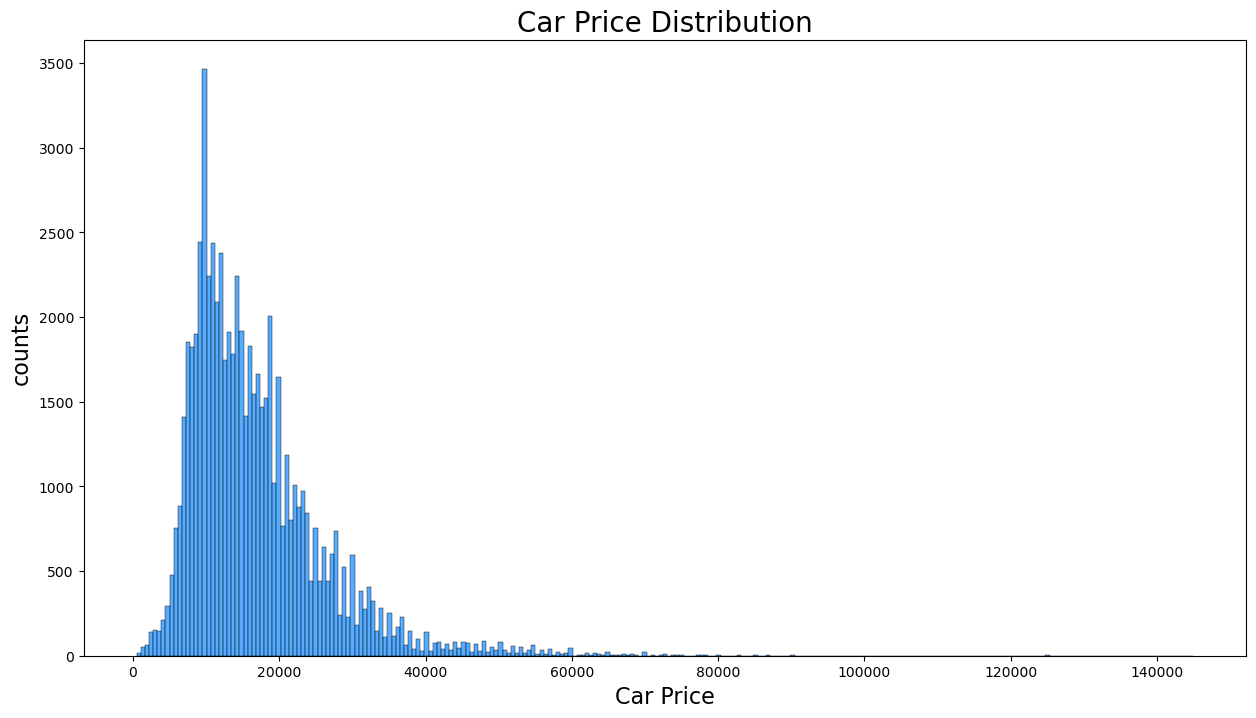

In [14]:
plt.figure(figsize=(15,8))
plt.title('Car Price Distribution',fontsize=20)
sns.histplot(x=car_data['price'],color="dodgerblue",bins=int(np.sqrt(len(car_data['price']))))
plt.ylabel('counts',fontsize=16)
plt.xlabel('Car Price',fontsize=16)
plt.show() 

### Year

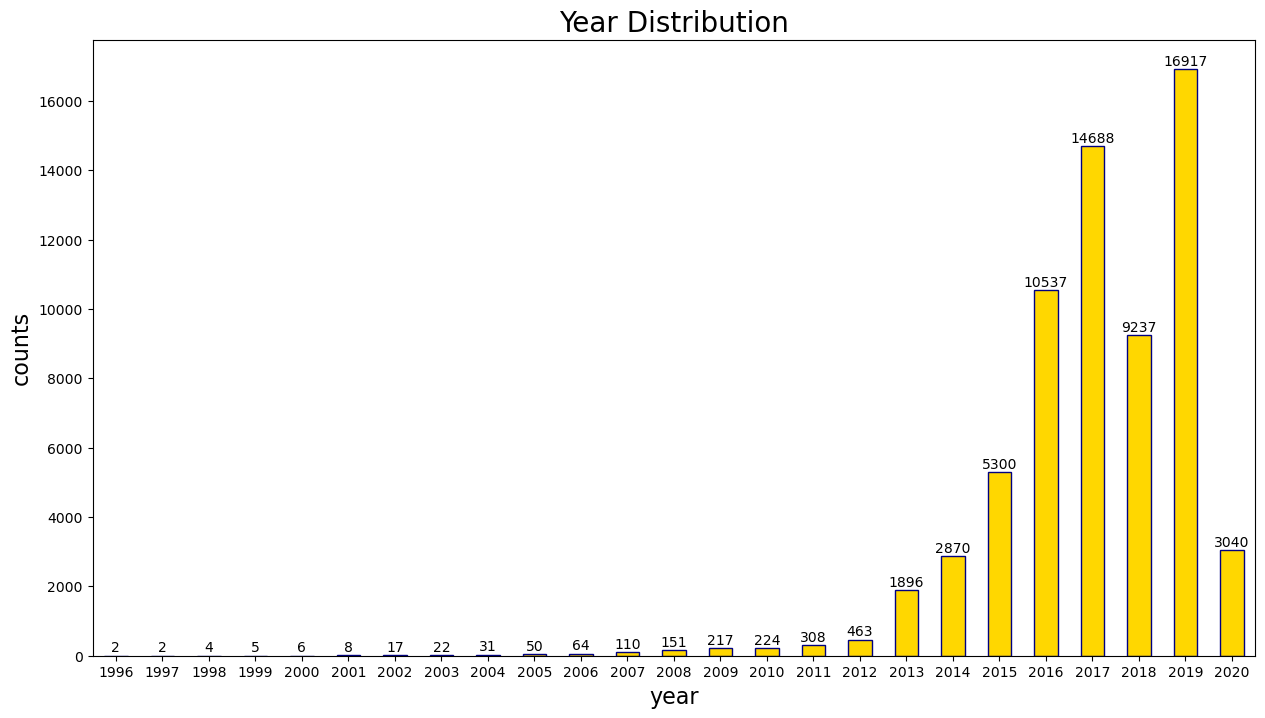

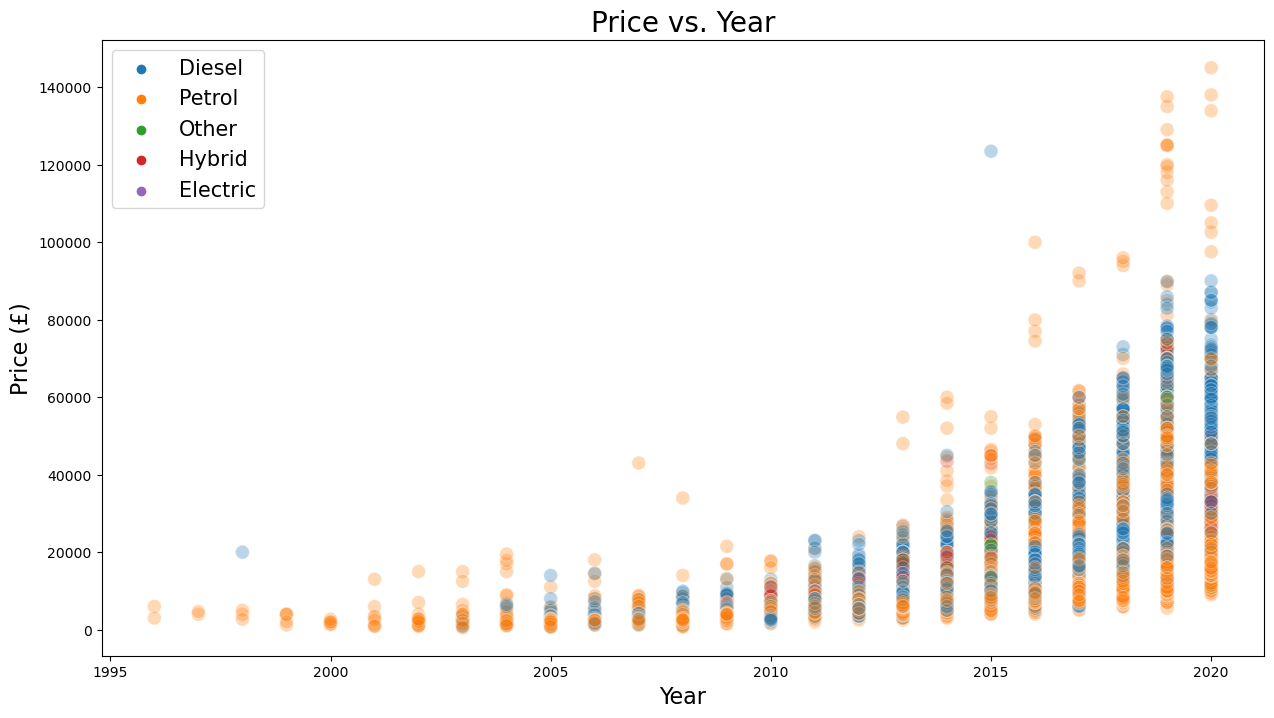

In [15]:
#year barplot
plt.figure(figsize=(15,8))
car_data['year'].value_counts().sort_index().plot.bar(edgecolor = "navy",color="gold")
plt.ylabel('counts',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.title('Year Distribution',fontsize=20)
plt.xticks(rotation = 0)
k=0
for i in car_data['year'].value_counts().sort_index():
    plt.text(k, i+110, "{}".format(i), ha = 'center')
    k=k+1

#year scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(data=car_data, x="year", y="price",alpha=0.3,hue="fuelType",s=100)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price (£)',fontsize=16)
plt.title('Price vs. Year',fontsize=20)
plt.legend(fontsize=15)
plt.show()

#print(car_data.sort_values(by=['price']))
#print(car_data[car_data['fuelType']=='Diesel'])
#print((car_data[car_data['model']=='Land Cruiser'].price))
#print(car_data.sort_values(by=['year']).head(10))
#print(car_data[car_data['fuelType']=='Diesel'].sort_values(by=['price']))

#### Notice that there is a blue dot in 2015 with price over 12K. It is way higher than other diesel cars, so dropped it. 

In [16]:
print(car_data[car_data['year']==2015].sort_values(by='price'))
car_data.drop(index=(3638),inplace=True)
print(car_data.shape)

          model  year   price transmission  mileage fuelType  roadTax   mpg  \
65617        KA  2015    3990       Manual    55000   Petrol       30  57.7   
61840        KA  2015    3999       Manual    48085   Petrol       30  57.7   
45325      Aygo  2015    4350       Manual    65143   Petrol        0  69.0   
65002        KA  2015    4450       Manual    49942   Petrol       30  57.7   
30316       I30  2015    4492       Manual   124000   Diesel        0  78.4   
...         ...   ...     ...          ...      ...      ...      ...   ...   
31087       RS6  2015   46000    Semi-Auto    20982   Petrol      325  29.4   
37613       RS6  2015   46465    Automatic    19963   Petrol      325  29.4   
32658       RS6  2015   51995    Semi-Auto    11484   Petrol      325  29.4   
40666        R8  2015   54945    Automatic    23924   Petrol      570  22.8   
3638   2 Series  2015  123456    Semi-Auto    33419   Diesel       20  68.9   

       engineSize   brand  
65617         1.2    fo

### Brand

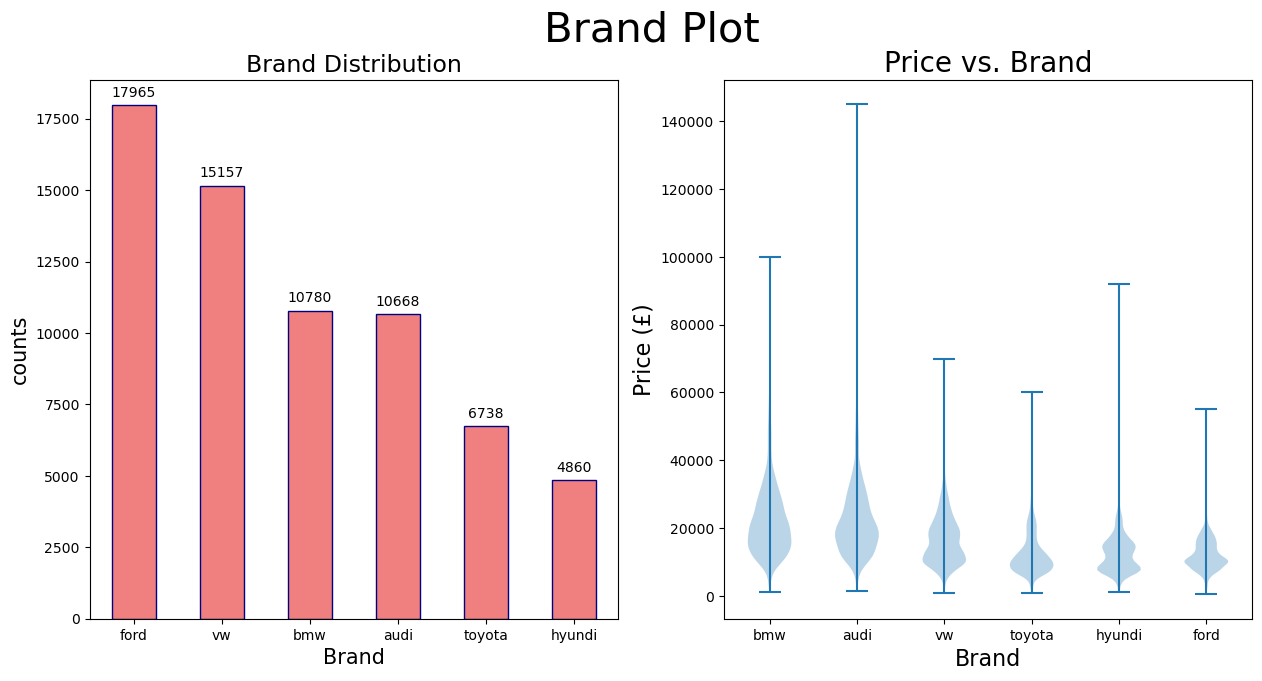

In [17]:
plt.figure(figsize=(15,7))
plt.suptitle('Brand Plot',fontsize=30)

#FuelType barplot
plt.subplot(1,2,1)
car_data['brand'].value_counts().plot.bar(edgecolor = "navy",color="lightcoral")
plt.ylabel('counts',fontsize=15)
plt.xlabel('Brand',fontsize=15)
plt.title('Brand Distribution',fontsize=17)
plt.xticks(rotation = 0)
k=0
for i in car_data['brand'].value_counts():
    plt.text(k, i+300, "{}".format(i), ha = 'center')
    k=k+1

#price vs. fuel type
plt.subplot(1,2,2)
dataset = [car_data[car_data['brand']=='bmw']['price'].values,
           car_data[car_data['brand']=='audi']['price'].values,
          car_data[car_data['brand']=='vw']['price'].values,
          car_data[car_data['brand']=='toyota']['price'].values,
          car_data[car_data['brand']=='hyundi']['price'].values,
          car_data[car_data['brand']=='ford']['price'].values,]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6],['bmw','audi','vw','toyota','hyundi','ford'])
plt.ylabel('Price (£)',fontsize=16)
plt.xlabel('Brand',fontsize=16)
plt.title('Price vs. Brand',fontsize=20)
plt.show()


### Model

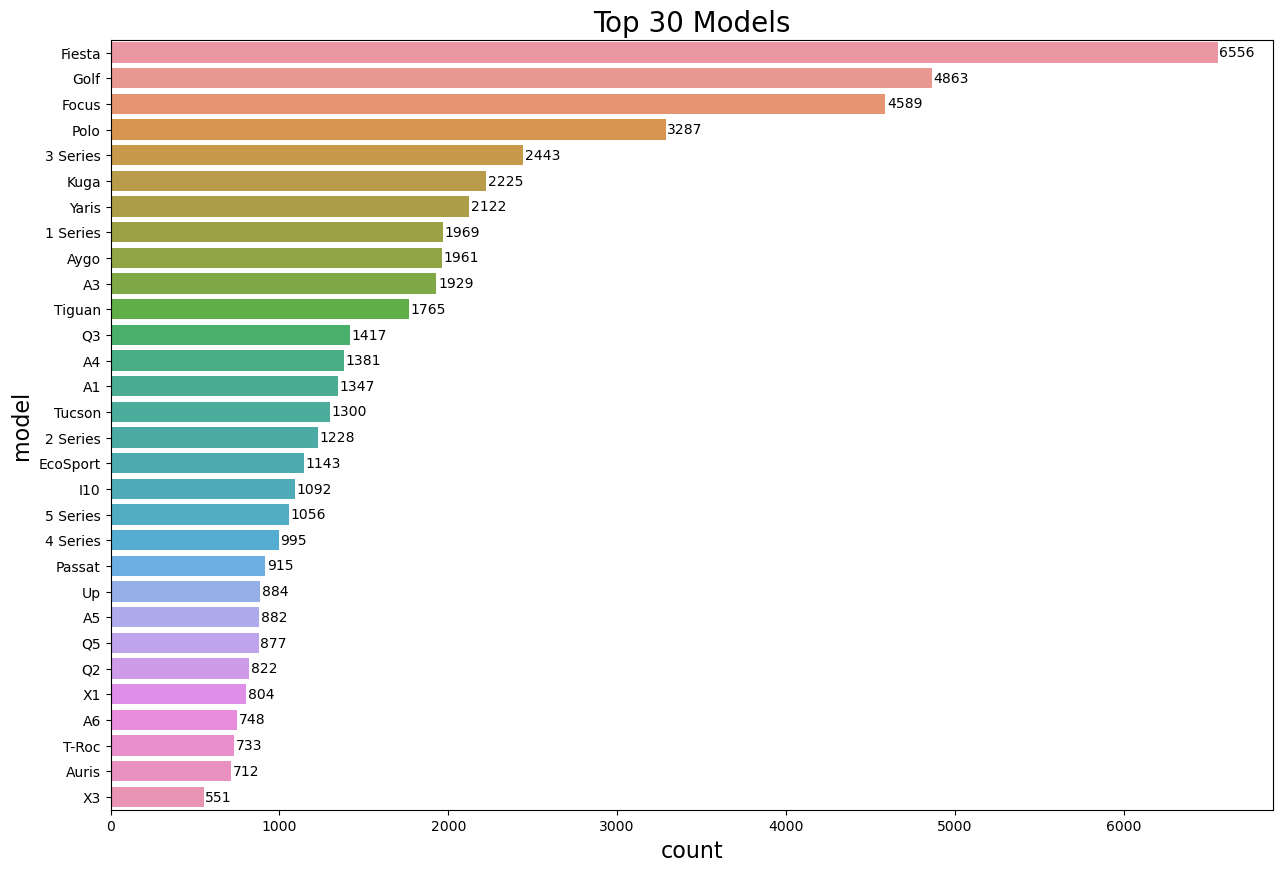

In [18]:
#Number of each model
plt.figure(figsize=(15,10))
plt.title('Top 30 Models',fontsize=20)
plt.ylabel('Models',fontsize=16)
plt.xlabel('counts',fontsize=16)
sns.countplot(y=car_data['model'],order = car_data['model'].value_counts().index[:30])

k=0
for i in car_data['model'].value_counts()[:30]:
    plt.text(i+10, k, "{}".format(i), va = 'center')
    k=k+1

plt.show() 

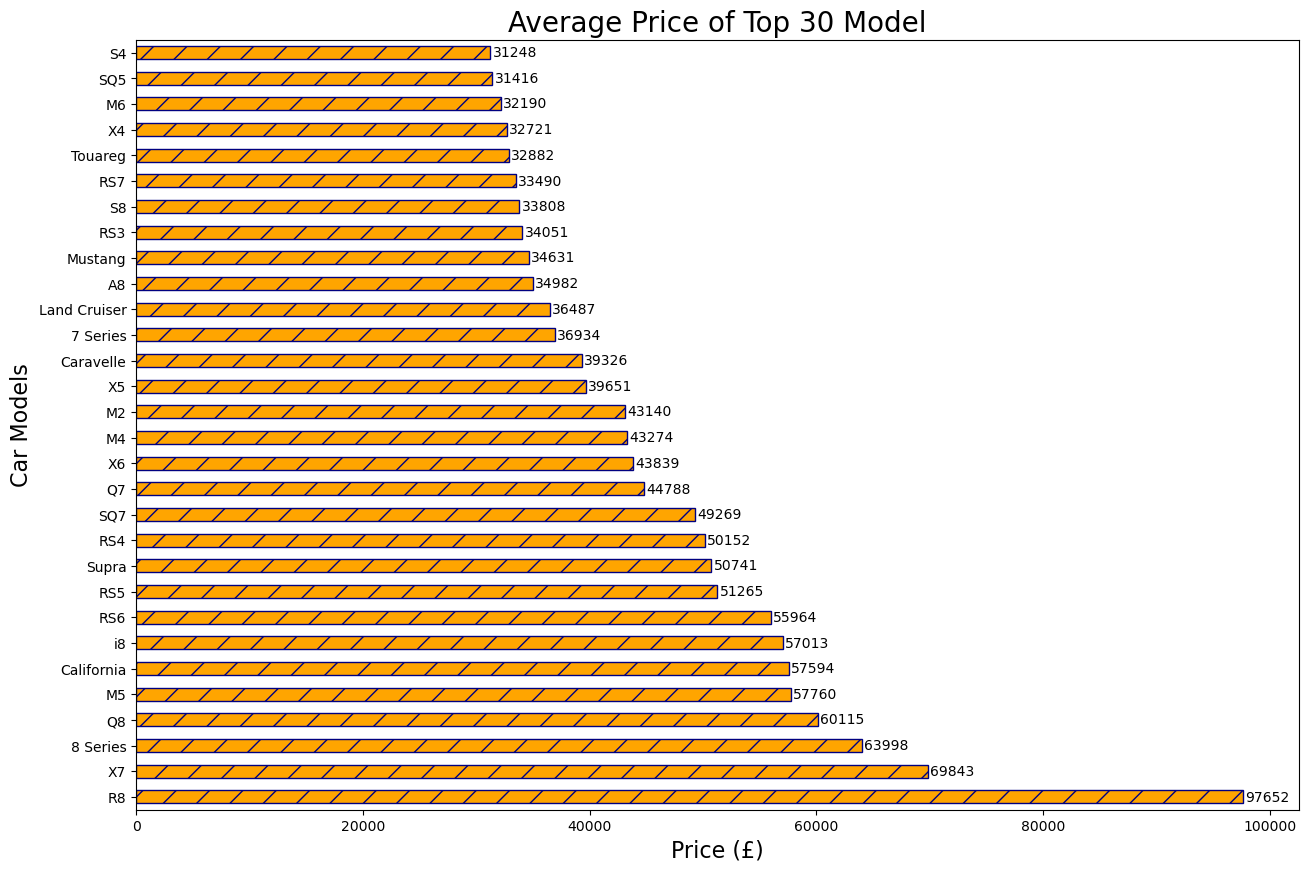

In [19]:
#average price of each model
mean_car_price= car_data.groupby('model').price.mean().sort_values(ascending=False)
#print(mean_car_price)

patterns = [ "/" ]
plt.figure(figsize=(15,10))
mean_car_price[:30].plot.barh(edgecolor = "navy",color="orange",hatch=patterns[0])
plt.ylabel('Car Models',fontsize=16)
plt.xlabel('Price (£)',fontsize=16)
plt.title('Average Price of Top 30 Model',fontsize=20)
k=0
for i in mean_car_price[:30]:
    plt.text(i+200, k, "{:.0f}".format(i), va = 'center')
    k=k+1

plt.show()

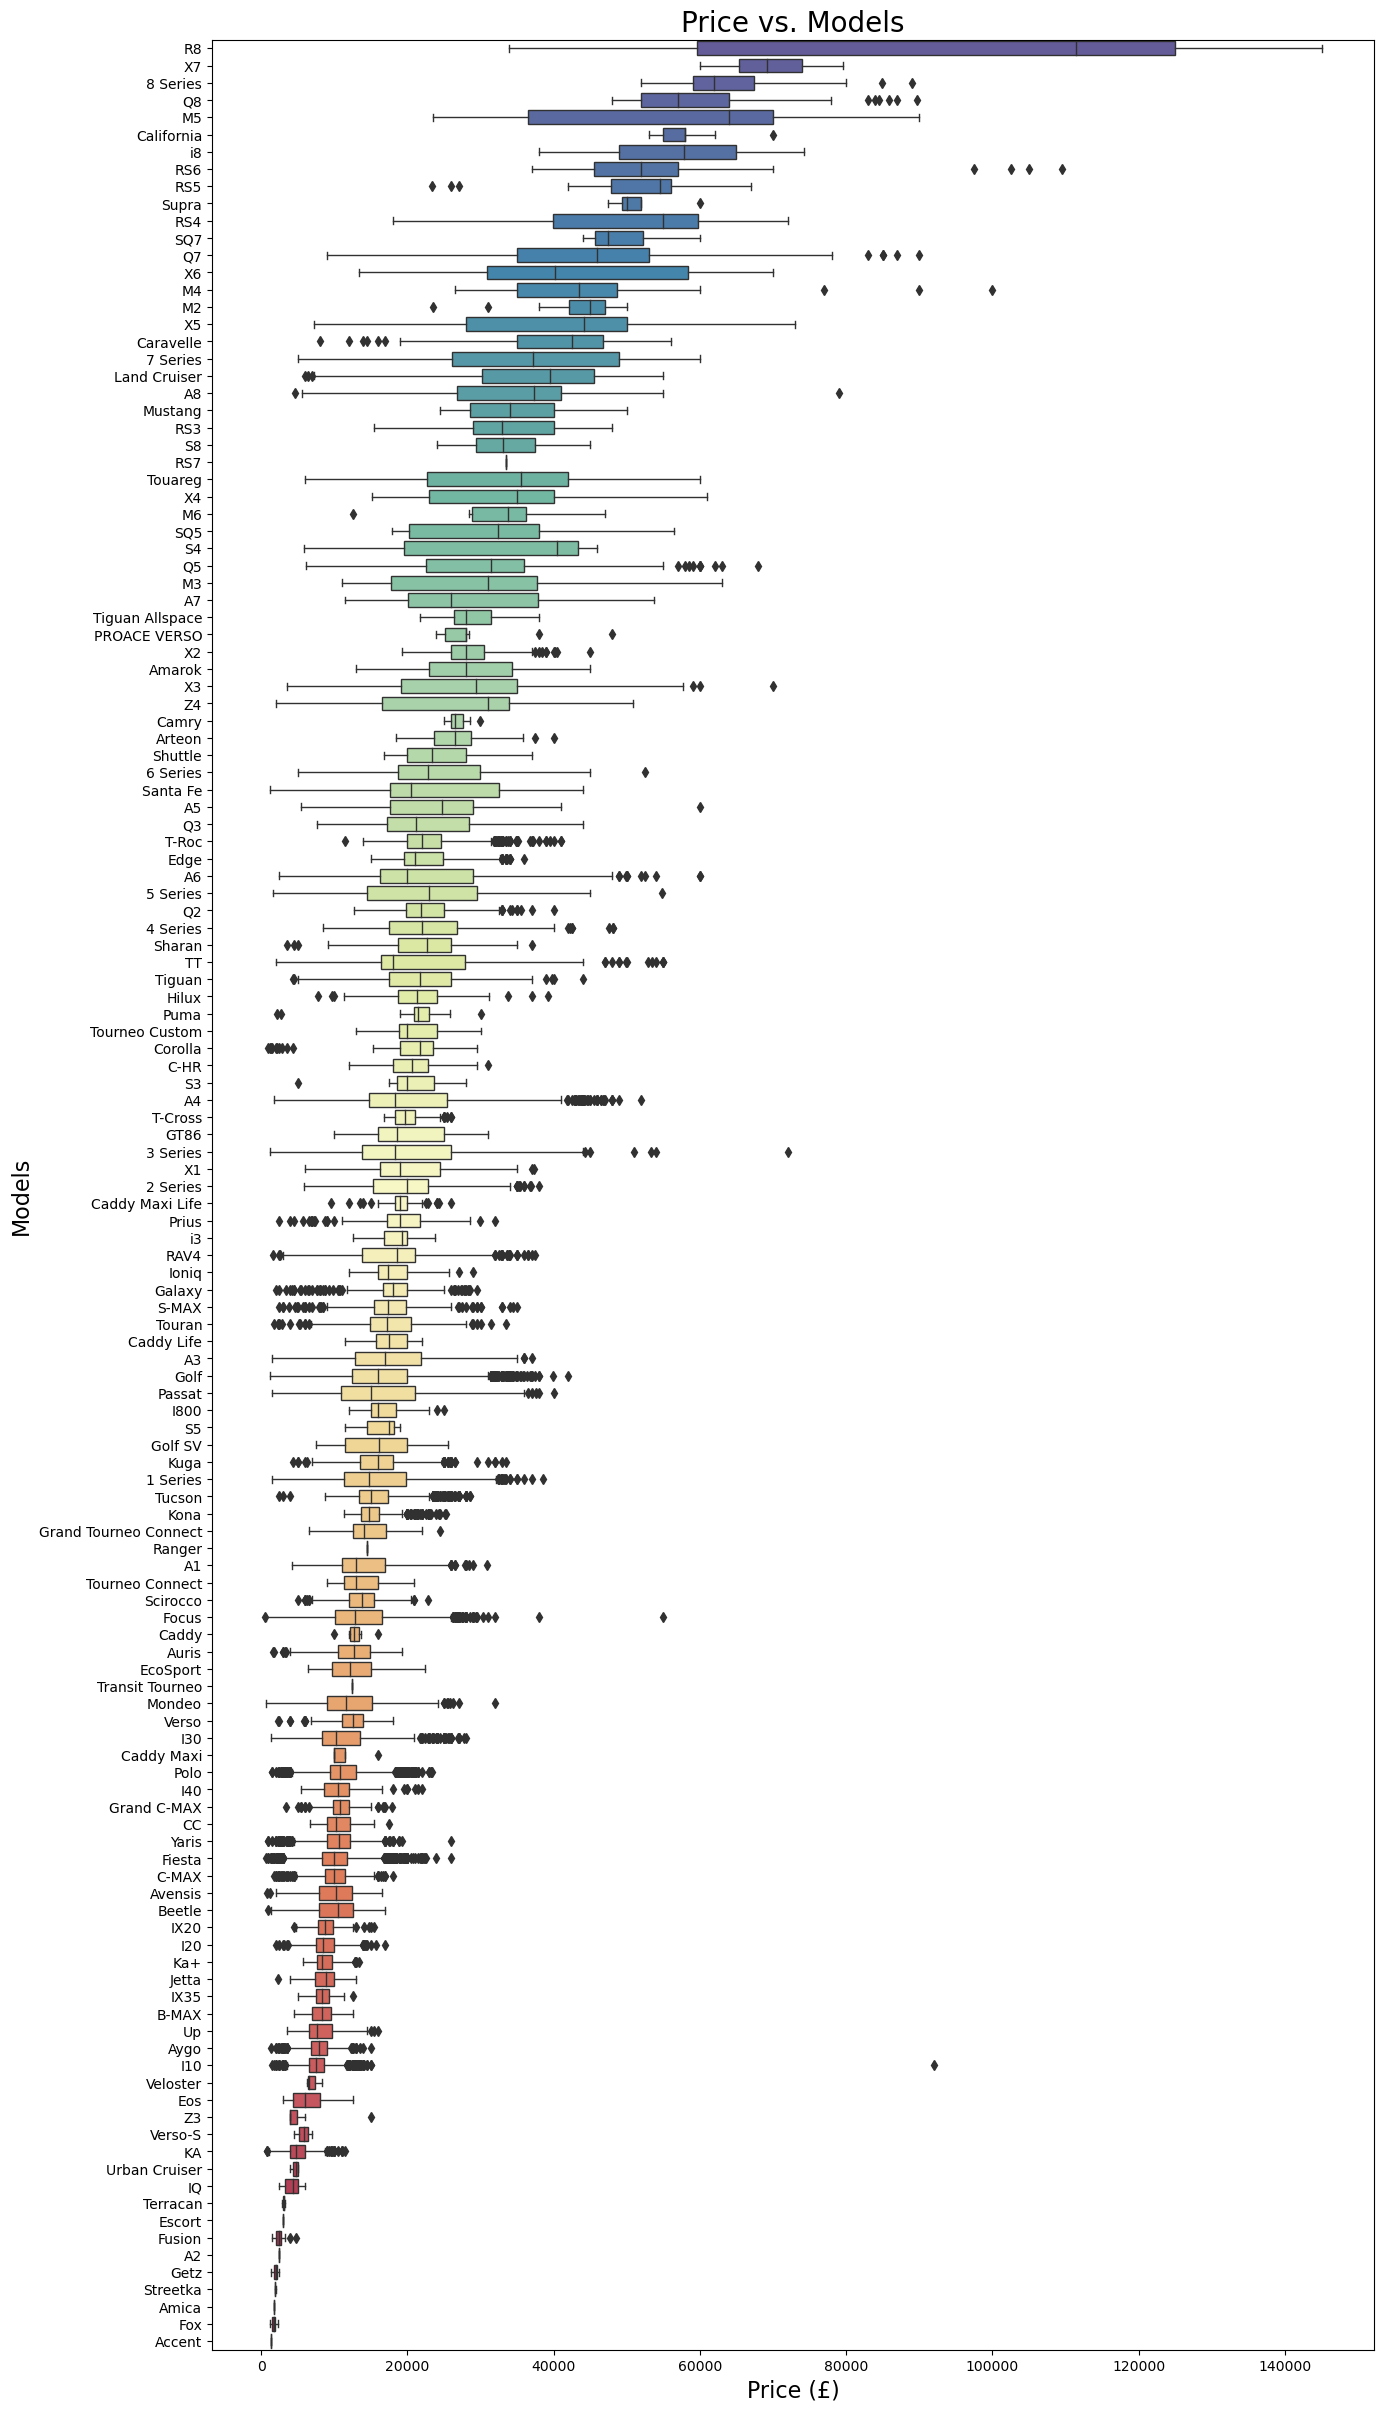

In [20]:
#price vs. models
my_order = car_data.groupby('model').price.mean().sort_values(ascending=False).index

plt.figure(figsize=(15,30))

sns.boxplot(y=car_data["model"], x=car_data["price"],order=my_order,palette="Spectral_r", linewidth=1)
plt.xlabel('Price (£)',fontsize=16)
plt.ylabel('Models',fontsize=16)
plt.title('Price vs. Models',fontsize=20)
plt.show()

### Transmission

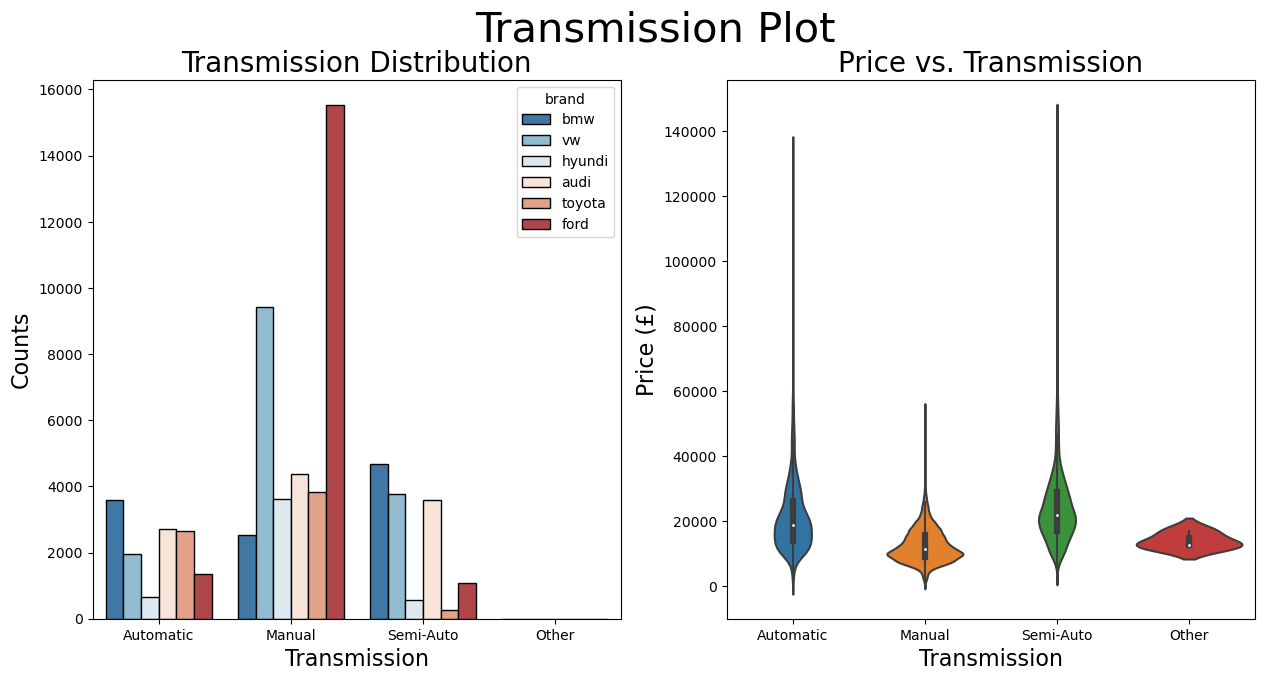

In [21]:
plt.figure(figsize=(15,7))
plt.suptitle('Transmission Plot',fontsize=30)

#transmission barplot
plt.subplot(1,2,1)
sns.countplot(data=car_data, x='transmission', hue='brand',palette='RdBu_r',edgecolor="black")
plt.xlabel('Transmission',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Transmission Distribution',fontsize=20)

#transmission vs. price
plt.subplot(1,2,2)
sns.violinplot(data=car_data, y="price", x="transmission")

plt.xlabel('Transmission',fontsize=16)
plt.ylabel('Price (£)',fontsize=16)
plt.title('Price vs. Transmission',fontsize=20)

plt.show()

### Mileage

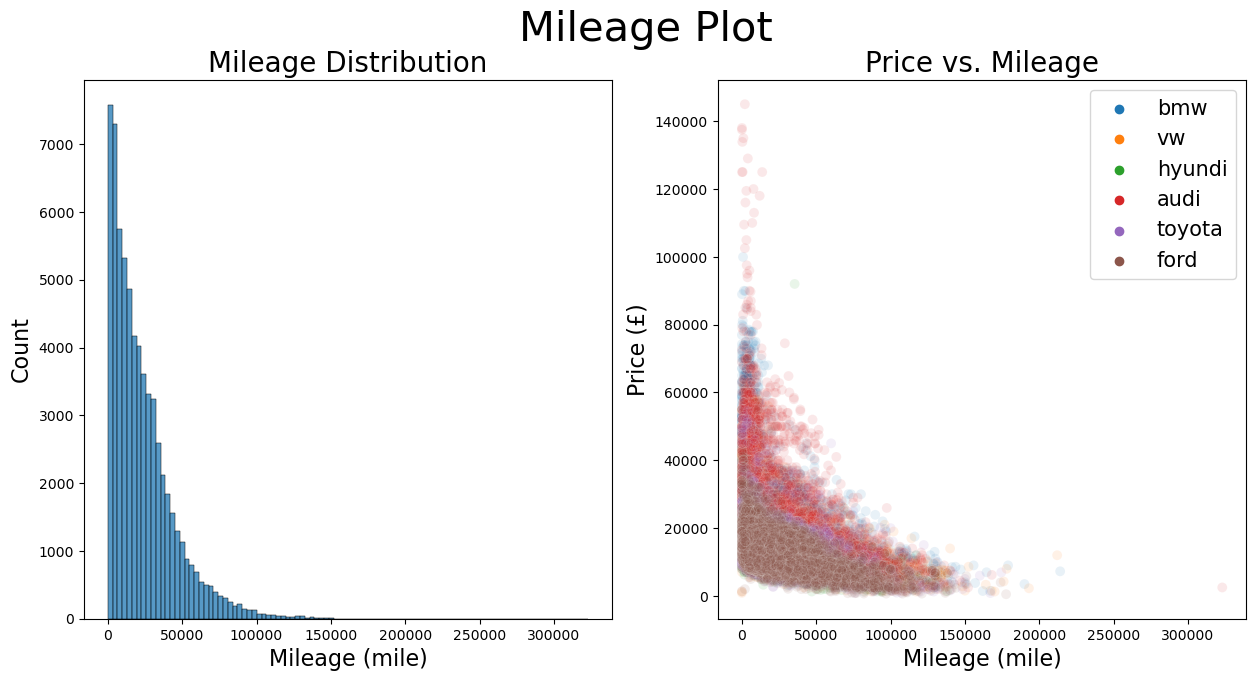

In [22]:
plt.figure(figsize=(15,7))
plt.suptitle('Mileage Plot',fontsize=30)

#histogram of mileage
plt.subplot(1,2,1)
sns.histplot(data=car_data, x="mileage",bins=100)
plt.xlabel('Mileage (mile)',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Mileage Distribution',fontsize=20)

#price vs. mileage
plt.subplot(1,2,2)
sns.scatterplot(data=car_data, x="mileage", y="price",alpha=0.1,hue="brand",s=50)
plt.xlabel('Mileage (mile)',fontsize=16)
plt.ylabel('Price (£)',fontsize=16)
plt.title('Price vs. Mileage',fontsize=20)
plt.legend(fontsize=15)
plt.show()

### FuelType

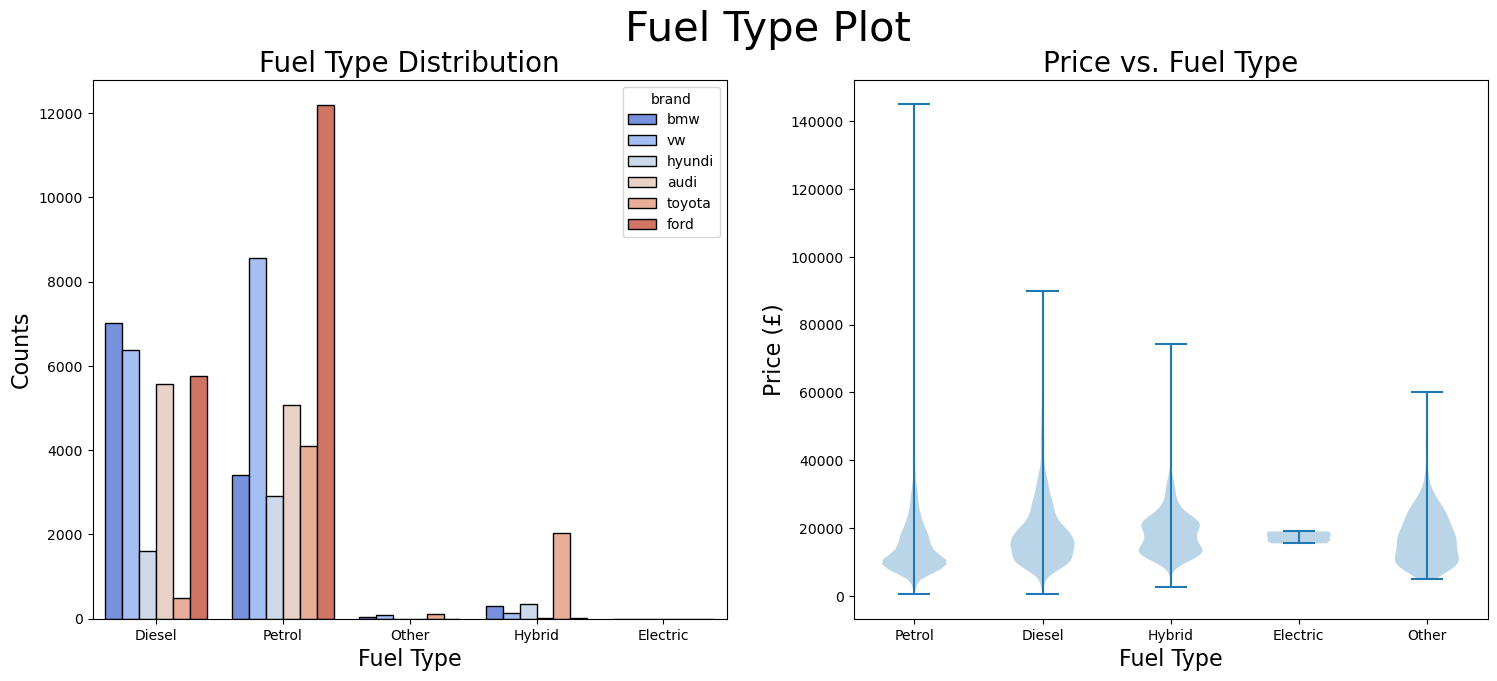

In [23]:
plt.figure(figsize=(18,7))
plt.suptitle('Fuel Type Plot',fontsize=30)

#FuelType barplot
plt.subplot(1,2,1)
sns.countplot(data=car_data, x='fuelType', hue='brand',palette='coolwarm',edgecolor="black")
plt.xlabel('Fuel Type',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Fuel Type Distribution',fontsize=20)

#price vs. fuel type
plt.subplot(1,2,2)
dataset = [car_data[car_data['fuelType']=='Petrol']['price'].values,
           car_data[car_data['fuelType']=='Diesel']['price'].values,
          car_data[car_data['fuelType']=='Hybrid']['price'].values,
          car_data[car_data['fuelType']=='Electric']['price'].values,
          car_data[car_data['fuelType']=='Other']['price'].values,]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['Petrol','Diesel','Hybrid','Electric','Other'])
plt.ylabel('Price (£)',fontsize=16)
plt.xlabel('Fuel Type',fontsize=16)
plt.title('Price vs. Fuel Type',fontsize=20)
plt.show()

### MPG

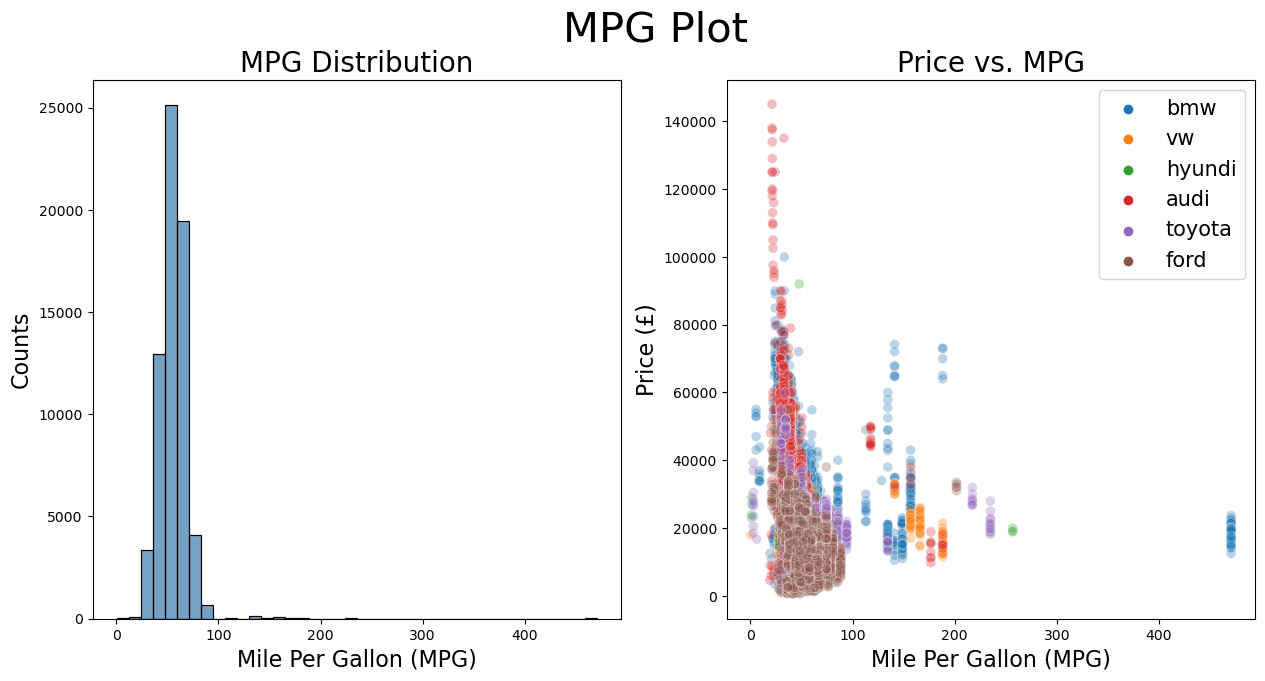

In [24]:
plt.figure(figsize=(15,7))
plt.suptitle('MPG Plot',fontsize=30)

#histogram of mileage
plt.subplot(1,2,1)
sns.histplot(data=car_data, x="mpg",bins=40,color="steelblue")
plt.xlabel('Mile Per Gallon (MPG)',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('MPG Distribution',fontsize=20)

#MPG vs. price
plt.subplot(1,2,2)
sns.scatterplot(data=car_data, x="mpg", y="price",alpha=0.3,hue="brand",s=50)
plt.xlabel('Mile Per Gallon (MPG)',fontsize=16)
plt.ylabel('Price (£)',fontsize=16)
plt.title('Price vs. MPG',fontsize=20)
plt.legend(fontsize=15)
plt.show()



### Tax

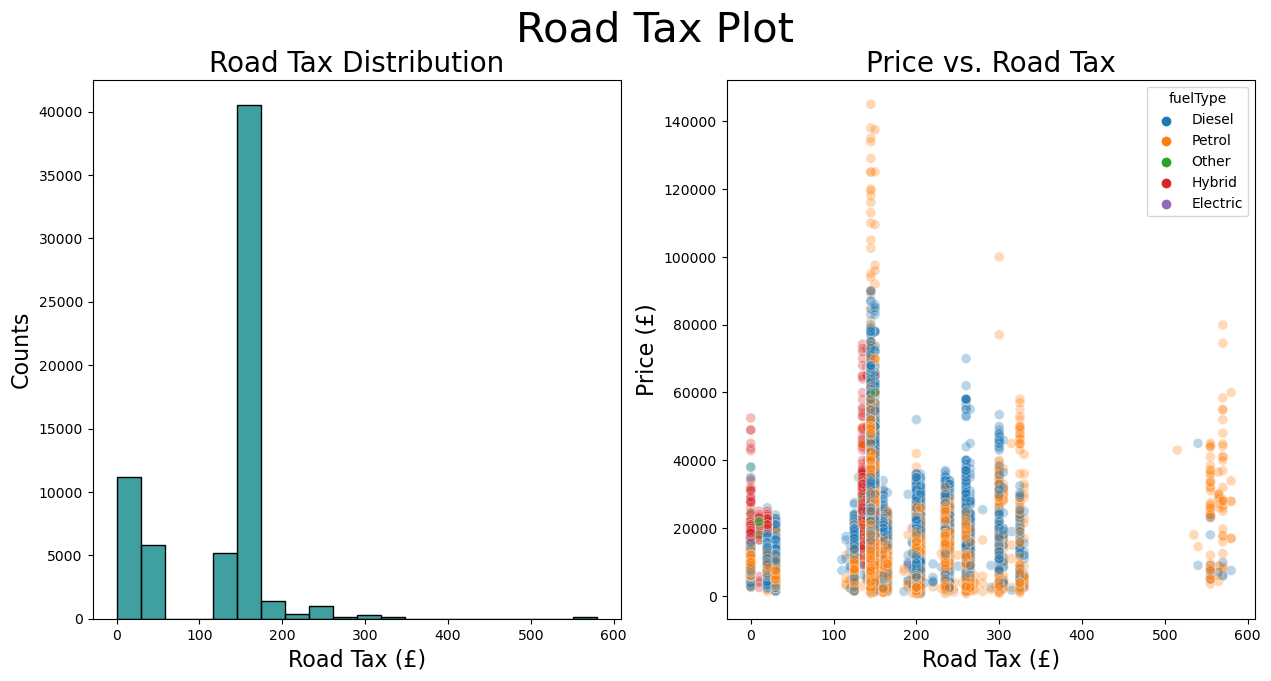

In [25]:
plt.figure(figsize=(15,7))
plt.suptitle('Road Tax Plot',fontsize=30)

#histogram of tax
plt.subplot(1,2,1)
sns.histplot(data=car_data, x="roadTax",bins=20,color="teal")
plt.xlabel('Road Tax (£)',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Road Tax Distribution',fontsize=20)


#tax vs. price
plt.subplot(1,2,2)
sns.scatterplot(data=car_data, x="roadTax", y="price",alpha=0.3,s=50,color="seagreen",hue="fuelType")
plt.xlabel('Road Tax (£)',fontsize=16)
plt.ylabel('Price (£)',fontsize=16)
plt.title('Price vs. Road Tax',fontsize=20)
plt.show()


### Engine Size

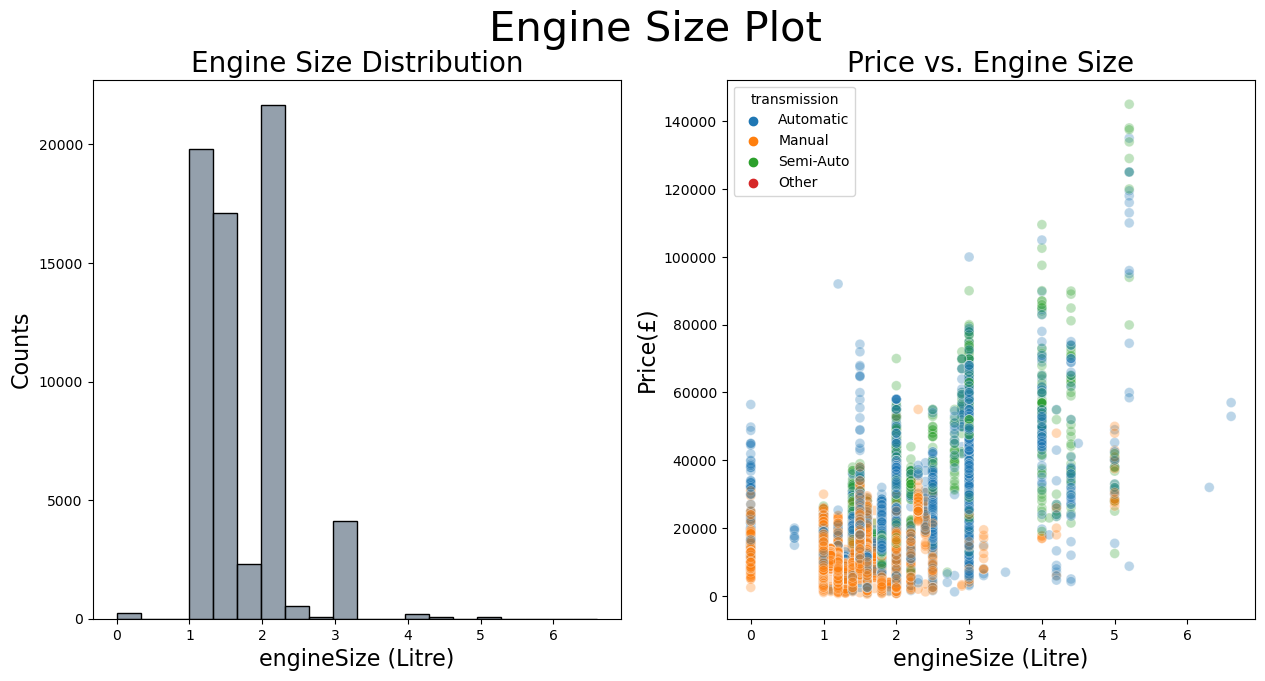

In [26]:
plt.figure(figsize=(15,7))
plt.suptitle('Engine Size Plot',fontsize=30)


#histogram of engineSize
plt.subplot(1,2,1)
sns.histplot(data=car_data, x="engineSize",bins=20,color="slategrey")
plt.xlabel('engineSize (Litre)',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Engine Size Distribution',fontsize=20)


#engine size vs. price
plt.subplot(1,2,2)
sns.scatterplot(data=car_data, x="engineSize", y="price",alpha=0.3,s=50,color="seagreen",hue="transmission")
plt.xlabel('engineSize (Litre)',fontsize=16)
plt.ylabel('Price(£)',fontsize=16)
plt.title('Price vs. Engine Size',fontsize=20)
plt.show()



### Scatter Matrix

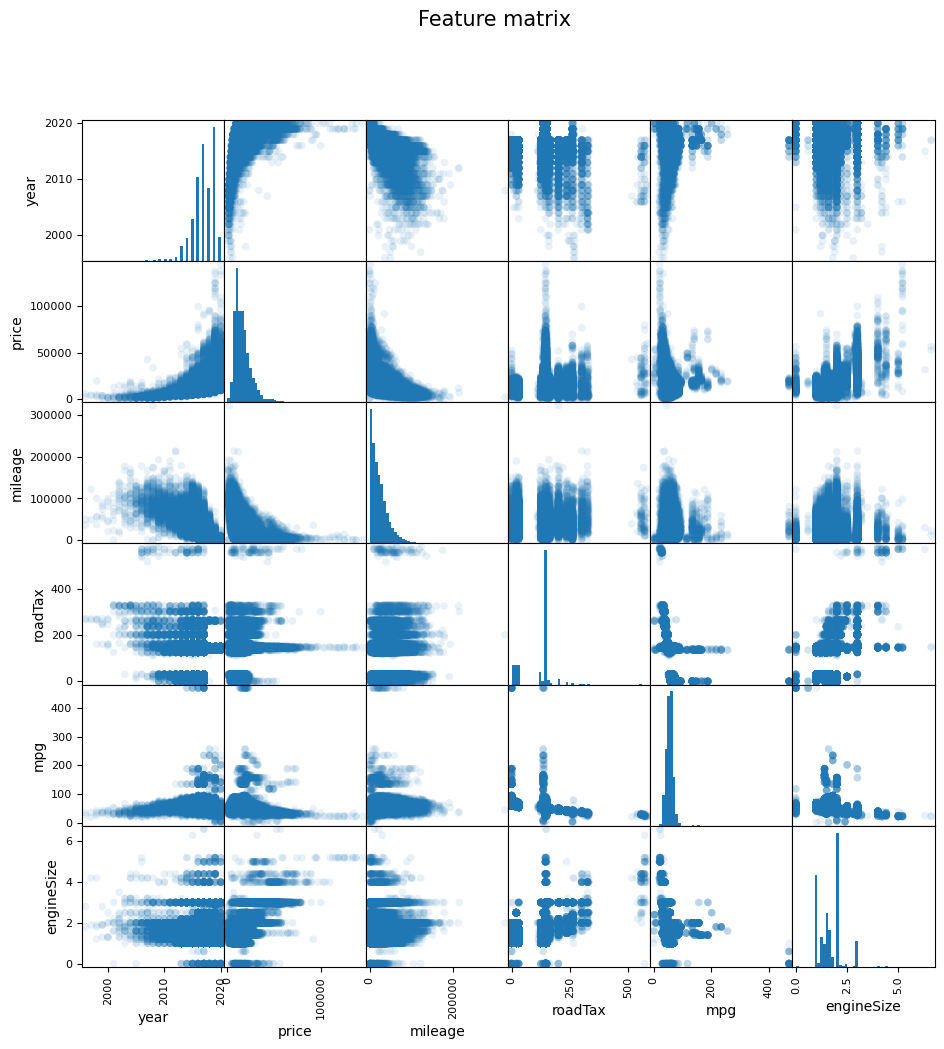

In [27]:
pd.plotting.scatter_matrix(car_data.select_dtypes(include=np.number), figsize=(11, 11), 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.suptitle('Feature matrix', fontsize = 15)
#plt.title('Heatmap of correlation matrix', fontsize = 15)
#plt.xlabel("features")
#plt.ylabel("features")
plt.show()


correlation matrix:
                year     price   mileage   roadTax       mpg  engineSize
year        1.000000  0.523927 -0.748718  0.229176 -0.143403   -0.023324
price       0.523927  1.000000 -0.430941  0.351584 -0.330352    0.630911
mileage    -0.748718 -0.430941  1.000000 -0.221432  0.177617    0.117520
roadTax     0.229176  0.351584 -0.221432  1.000000 -0.427894    0.309294
mpg        -0.143403 -0.330352  0.177617 -0.427894  1.000000   -0.287898
engineSize -0.023324  0.630911  0.117520  0.309294 -0.287898    1.000000
--------------------------------------------------


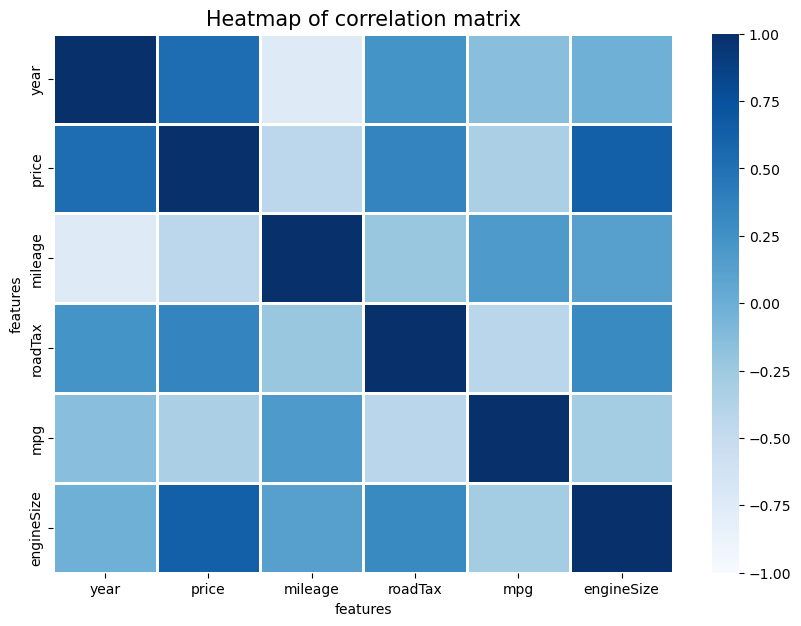

In [28]:
#calculate the Pearson correlation matrix
plt.figure(figsize=(10,7))
cor=car_data.corr(method='pearson')
print("correlation matrix:")
print(cor)
print("-"*50)
# plotting correlation heatmap
dataplot=sns.heatmap(cor,cmap='Blues',linewidths=1,vmin=-1, vmax=1)
plt.title('Heatmap of correlation matrix', fontsize = 15)
plt.xlabel("features")
plt.ylabel("features")
plt.show()

# Split

In [29]:
from sklearn.model_selection import train_test_split 

print("total set:",car_data.shape)
random_state=42
y = car_data['price'] 
X = car_data.loc[:, car_data.columns != 'price'] 
print("-"*30)
print("Basic Splitting: Train 80%, Val 10%, Test 10%")
# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,shuffle=True,random_state=random_state)
print('training set:',X_train.shape, y_train.shape) 

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,shuffle=True,random_state=random_state)
print('validation set:',X_val.shape, y_val.shape) 
print('test set:',X_test.shape, y_test.shape) 

print("="*50)
print('X_train Set')
print(X_train.head())
print("-"*30)
print('y_train Set')
print(y_train.head())

total set: (66168, 10)
------------------------------
Basic Splitting: Train 80%, Val 10%, Test 10%
training set: (52934, 9) (52934,)
validation set: (6617, 9) (6617,)
test set: (6617, 9) (6617,)
X_train Set
          model  year transmission  mileage fuelType  roadTax   mpg  \
9294   6 Series  2014    Automatic    27782   Diesel      160  50.4   
19198      Polo  2015    Semi-Auto    13791   Petrol       20  60.1   
30142       I20  2014       Manual    30750   Petrol       30  57.6   
43539     Yaris  2019       Manual     5988   Petrol      145  47.9   
42698     Yaris  2019       Manual    11996   Petrol      145  47.9   

       engineSize   brand  
9294          3.0     bmw  
19198         1.2      vw  
30142         1.2  hyundi  
43539         1.5  toyota  
42698         1.5  toyota  
------------------------------
y_train Set
9294     18999
19198    11000
30142     4995
43539    10660
42698    10990
Name: price, dtype: int64


# Preprocessing

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# collect which encoder to use on each feature
onehot_ftrs = ['model','transmission','fuelType',"brand"]
std_ftrs = ['year','mileage','roadTax','mpg','engineSize']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)],remainder="passthrough")

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print("origin size of X_train:",X_train.shape)
print("after preprocessing, size of X_train:",X_train_prep.shape)
print("=="*50)
print(X_train_prep)

#put column names back after preprocessing
data_column_names = clf.steps[0][1].get_feature_names_out()
x_train_review=pd.DataFrame(X_train_prep)
x_train_review.columns =data_column_names
x_train_review

origin size of X_train: (52934, 9)
after preprocessing, size of X_train: (52934, 154)
[[ 0.          0.          0.         ...  0.66695599 -0.3086317
   2.36608045]
 [ 0.          0.          0.         ... -1.49890883  0.24738573
  -0.79694398]
 [ 0.          0.          0.         ... -1.3442042   0.10408227
  -0.79694398]
 ...
 [ 0.          0.          0.         ...  0.66695599 -0.40607806
   0.60884466]
 [ 0.          0.          0.         ...  0.12548979  0.24738573
   0.60884466]
 [ 0.          0.          0.         ... -1.3442042  -0.14239969
  -0.44549682]]


,onehot__model_1 Series,onehot__model_2 Series,onehot__model_3 Series,onehot__model_4 Series,onehot__model_5 Series,onehot__model_6 Series,onehot__model_7 Series,onehot__model_8 Series,onehot__model_A1,onehot__model_A2,...,onehot__brand_bmw,onehot__brand_ford,onehot__brand_hyundi,onehot__brand_toyota,onehot__brand_vw,std__year,std__mileage,std__roadTax,std__mpg,std__engineSize
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.425234,0.203297,0.666956,-0.308632,2.366080
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.955700,-0.451229,-1.498909,0.247386,-0.796944
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.425234,0.342146,-1.344204,0.104082,-0.796944
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.922437,-0.816269,0.434899,-0.451935,-0.269773
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.922437,-0.535203,0.434899,-0.451935,-0.269773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.391971,-0.979444,0.434899,-0.308632,0.608845
52930,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.016632,-0.285949,0.744308,-0.251310,2.366080
52931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.016632,1.189694,0.666956,-0.406078,0.608845
52932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.486166,-0.416096,0.125490,0.247386,0.608845
